In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

# 1. Ridge Regression 

In [1012]:
def program_1(Y,X,D,lamb):
    x_bar = X.mean()
    y_bar = Y.mean()
    xc = np.array([(X.iloc[0] - x_bar).to_numpy()])
    yc = np.array([(Y.iloc[0] - y_bar).to_numpy()])
    for i in range(1,len(X)):
        val_x = (X.iloc[i] - x_bar).to_numpy()
        val_y = (Y.iloc[i] - y_bar).to_numpy()
        xc = np.vstack((xc,val_x))
        yc = np.vstack((yc,val_y))
    b_hat = np.dot(np.linalg.inv(np.dot(xc.T,xc)+lamb*D),np.dot(xc.T,yc))
    beta_zero = y_bar - np.dot(b_hat.T,x_bar)
    return [b_hat,beta_zero]

In [1013]:
train1 = pd.read_csv('project3_F2020_Set1Train.csv')
print('Shape of the train dataset:',train1.shape)
display(train1.head())
X1_train = train1.loc[:,'x1':'x4']
Y1_train = train1.loc[:,'y1':'y4']

Shape of the train dataset: (50, 8)


,x1,x2,x3,x4,y1,y2,y3,y4
0,0.606896,-0.720488,0.506829,-1.412712,0.233275,0.211846,-0.209617,1.092333
1,1.095596,-0.651107,1.412341,-0.806660,-0.066973,1.830081,0.113693,2.788914
2,-0.988516,1.250718,0.165874,-0.469454,-0.388012,-1.959737,-0.709900,0.574179
3,-0.542340,-0.908381,-1.291244,-1.577339,-1.167615,-0.919405,-2.557312,-2.431072
4,0.960383,-0.939526,1.139075,-0.766487,-0.607374,2.235447,-0.258331,2.665624


In [1014]:
test1 = pd.read_csv('project3_F2020_Set1Test.csv')
print('Shape of the test dataset:',test1.shape)
display(test1.head())
X1_test = test1.loc[:,'x1':'x4']
Y1_test = test1.loc[:,'y1':'y4']

Shape of the test dataset: (1000, 8)


,x1,x2,x3,x4,y1,y2,y3,y4
0,0.602321,0.807560,-0.239030,-1.328612,0.663577,1.248533,-0.802823,-1.360854
1,0.948874,1.056387,-0.250735,0.536077,1.257174,2.562511,0.502637,-0.186225
2,-1.593617,-0.340660,-0.409221,-1.114634,-1.461028,-3.197548,-1.604647,-1.255989
3,-0.111770,-0.343052,-1.012755,1.079099,0.165462,-0.402549,0.445664,-1.951113
4,1.613283,0.867685,0.139412,-0.501156,2.533747,2.151000,-0.615875,-0.050466


In [1015]:
d = X1_train.shape[1]
D = np.identity(d)

lambdas = np.linspace(0.01,2,200)
errors = []
for lamb in lambdas:
    b_hat,beta_zero = program_1(Y1_train,X1_train,D,lamb)
    err = 0
    for i in range(X1_test.shape[0]):
        pred_y = beta_zero + np.dot(b_hat.T,X1_test.iloc[i])
        err+= np.linalg.norm(pred_y-Y1_test.iloc[i])
    errors.append(err/X1_test.shape[0])

Text(0.5, 1.0, 'Graph of Lambda v.s Error')

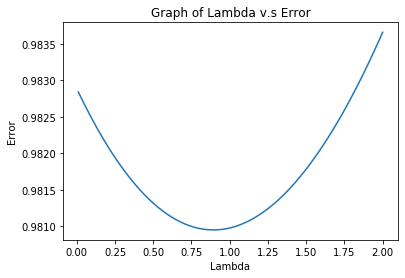

In [1016]:
plt.plot(lambdas,errors)
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.title('Graph of Lambda v.s Error')

In [1019]:
d = X1_train.shape[1]
D = np.identity(d)

b_hat_1,beta_zero_1 = program_1(Y1_train,X1_train,D,lamb=1)
print('Estimated b')
print(b_hat_1)
print('Estimated beta_0')
print(beta_zero_1.tolist())

Estimated b
[[ 1.03987953  1.95454225 -0.05625942 -0.01502408]
 [ 0.87322223 -0.0591789   0.04609397 -0.07385095]
 [-0.09005873 -0.00785662  1.02079797  2.05543831]
 [ 0.08937484  0.0615837   0.92981037  0.07385764]]
Estimated beta_0
[-0.007844069389003894, 0.014105280430437128, -0.02314242500498561, -0.04277628776538226]


# 2.  Ridge Regression and Sylvester Equation

In [8]:
set2 = pd.read_csv('project3_F2020_Set2.csv')
set2

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
0,0.933942,0.511451,-0.350902,-1.465743,-1.829639,-1.684360,-1.683899,-1.313641,-1.485658,-1.569560,...,-0.182251,-0.362068,-0.158990,-0.448929,-0.732968,-0.347078,-0.229350,-0.323028,-0.320146,-0.546922
1,-0.142439,0.370873,-0.578081,-0.876288,-0.658061,-0.824786,-0.913443,-1.106479,-0.975723,-0.956138,...,0.851502,0.830914,0.512775,0.752462,0.755562,0.567790,0.575908,0.544469,0.580176,0.410688
2,-0.276756,-0.683288,1.470273,2.442921,2.530216,2.676155,2.543586,2.132613,2.780670,2.614583,...,-0.119306,-0.012177,-0.628837,-0.287789,-0.041139,-0.030031,0.171787,0.233468,0.468795,0.313663
3,-0.513765,1.714472,-0.940907,-0.917747,-0.876113,-0.622837,-0.558706,-0.413276,-0.729130,-0.509830,...,2.131398,2.355987,1.640676,2.217475,1.653860,2.213024,1.693335,1.605347,1.255414,1.571288
4,-0.917167,0.741472,-0.867991,-0.870348,-0.636118,-0.622946,-0.450606,-0.685055,-0.316814,-0.653286,...,2.062069,1.514200,1.828965,1.807724,1.814363,1.507955,1.509973,1.516139,1.828839,1.560979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.785593,-1.805104,0.774292,-0.315503,-0.325708,-0.200460,-0.173312,-0.796942,-0.599817,-0.718774,...,-2.203023,-2.058371,-1.826903,-1.897526,-1.777207,-1.518348,-1.369030,-1.681839,-1.378092,-1.407973
146,-0.135095,-1.197294,-1.756850,-3.827336,-4.066428,-4.442217,-3.972884,-4.609098,-4.419757,-4.801655,...,-0.745895,-0.555108,-0.680679,-0.475686,-0.634915,-0.513297,-0.378701,-0.513870,-0.163179,-0.068935
147,0.965316,-0.757352,0.153239,-1.236192,-1.139686,-1.226329,-1.348472,-1.241033,-1.342213,-1.410739,...,-1.376487,-1.200383,-1.258800,-0.871586,-0.801673,-1.156257,-1.371049,-1.078425,-1.281219,-1.120610
148,-1.323381,-0.400705,2.322320,5.378794,5.552253,5.279432,4.996482,5.555625,5.875846,5.292194,...,1.318810,1.063861,1.374943,0.977877,1.136345,1.435192,1.697690,1.364454,1.787072,1.458983


In [9]:
set2_X = set2.loc[:,'0':'2']
set2_Y = set2.loc[:,'3':]
set2_X.insert(loc=0, column='const', value=1)
set2_X.head()

,const,0,1,2
0,1,0.933942,0.511451,-0.350902
1,1,-0.142439,0.370873,-0.578081
2,1,-0.276756,-0.683288,1.470273
3,1,-0.513765,1.714472,-0.940907
4,1,-0.917167,0.741472,-0.867991


In [10]:
#AX+XB=Q
from scipy import linalg
def program_2(Y,X,lamb,D):
    a = np.dot(X.T,X)
    b = lamb*D
    q = np.dot(X.T,Y)
    B = linalg.solve_sylvester(a, b, q)
    beta0 = B[0]
    b = B[1:]
    return [beta0,b]

D=Id

In [1023]:
d = 4
q = 200
D = np.identity(q)
res10,res11 = program_2(set2_Y,set2_X,10,D)
print('shape of the beta0',res10.shape)
print('shape of the b',res11.shape)

shape of the beta0 (200,)
shape of the b (3, 200)


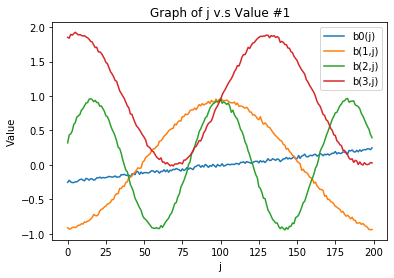

In [1024]:
q = 200
j = np.linspace(0,q-1,q)
plt.plot(j,res10,label = 'b0(j)')
plt.plot(j,res11[0],label = 'b(1,j)')
plt.plot(j,res11[1],label = 'b(2,j)')
plt.plot(j,res11[2],label = 'b(3,j)')
plt.xlabel("j")
plt.ylabel("Value")
plt.title('Graph of j v.s Value #1')
plt.legend()

D is a tridiagonal matrix with −1 above and below the diagonal, and 2 on the diagonal,
except D(1, 1) = D(q, q) = 1.

In [13]:
q = 200
from scipy.sparse import diags
m = diags([-1, 2, -1], [-1, 0, 1], shape=(q, q)).toarray()
m
m[0][0] = 1
m[q-1][q-1] = 1
m

array([[ 1., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

In [14]:
res11,res12 = program_2(set2_Y,set2_X,1000,m)
print('shape of the beta0',res11.shape)
print('shape of the b',res12.shape)

shape of the beta0 (200,)
shape of the b (3, 200)


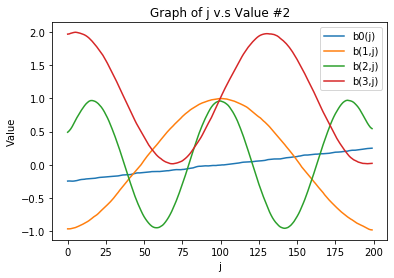

In [15]:
q = 200
j = np.linspace(0,q-1,q)
plt.plot(j,res11,label = 'b0(j)')
plt.plot(j,res12[0],label = 'b(1,j)')
plt.plot(j,res12[1],label = 'b(2,j)')
plt.plot(j,res12[2],label = 'b(3,j)')
plt.xlabel("j")
plt.ylabel("Value")
plt.title('Graph of j v.s Value #2')
plt.legend()

# 3. Ridge Regression Evaluation

In [1025]:
train3 = pd.read_csv('project3_F2020_Set3Train.csv')
test3 = pd.read_csv('project3_F2020_Set3Test.csv')
print('Shape of the train dataset:',train3.shape)
print('Shape of the test dataset:',test3.shape)
train3.head()

Shape of the train dataset: (250, 11)
Shape of the test dataset: (1000, 11)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,0.260438,0.097842,-0.951163,-0.811562,-0.796731,-0.851987,-0.651673,-0.240470,-0.637974,-0.894603,-167.661874
1,0.409162,-0.169204,-0.808798,-0.569568,-0.036620,-0.558032,0.441002,0.747107,0.640602,-0.860097,14.812718
2,0.152505,0.844515,-0.479109,0.537759,0.458164,0.792431,0.731155,-0.020144,-0.033775,0.738788,53.679322
3,0.807235,-0.559277,-0.492523,0.945566,0.398986,-0.191322,-0.387992,0.841648,0.409583,0.948857,26.722946
4,-0.777192,-0.571730,0.963313,0.840137,-0.995166,0.339687,-0.503595,0.650607,0.143833,-0.307223,5.119166


In [1026]:
X3_train = train3.loc[:,'X1':'X10']
X3_test = test3.loc[:,'X1':'X10']
Y3_train = train3.loc[:,'Y']
Y3_test = test3.loc[:,'Y']

In [1027]:
def program_1_update(Y,X,D,lamb):
    x_bar = X.mean()
    y_bar = Y.mean()
    xc = np.array([(X.iloc[0] - x_bar).to_numpy()])
    yc = np.array([(Y.iloc[0] - y_bar)])
    for i in range(1,len(Y)):
        val_x = (X.iloc[i] - x_bar).to_numpy()
        val_y = (Y.iloc[i] - y_bar)
        xc = np.vstack((xc,val_x))
        yc = np.vstack((yc,val_y))
    b_hat = np.dot(np.linalg.inv(np.dot(xc.T,xc)+lamb*D),np.dot(xc.T,yc))
    beta_zero = y_bar - np.dot(b_hat.T,x_bar)
    return [b_hat,beta_zero]

In [1028]:
d = X3_train.shape[1]
D = np.identity(d)

lambdas = np.linspace(1,100,100)
errors = []
for lamb in lambdas:
    b_hat,beta_zero = program_1_update(Y3_train,X3_train,D,lamb)
    err = 0
    for i in range(X3_test.shape[0]):
        pred_y = beta_zero + np.dot(b_hat.T,X3_test.iloc[i])
        err += (Y3_test.iloc[i] - pred_y)**2
    errors.append(err/X3_test.shape[0])

Text(0.5, 1.0, 'Graph of Lambda v.s Error')

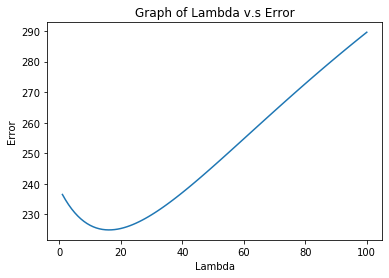

In [1029]:
plt.plot(lambdas,errors)
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.title('Graph of Lambda v.s Error')

In [1030]:
print("the minimum value of the error is {} and the parameter λ {} ".format(min(errors),lambdas[errors.index(min(errors))]))

the minimum value of the error is [224.93512432] and the parameter λ 16.0 


# 4. Kernel Version of Ridge Regression

**Gaussian**

In [1031]:
import math
def gaussian_kernel(x,y,sigma):
    fen_zi = -np.linalg.norm(x-y)**2
    fen_mu = 2 * sigma**(2)
    return np.exp(fen_zi/fen_mu)

In [1032]:
def kernel_1(X,Y,sigma):
    K = np.zeros((len(X),len(Y)))
    for i in range(len(Y)):
        for xx in range(len(X)):
            K[xx,i] += gaussian_kernel(X.iloc[xx],Y.iloc[i],sigma)
    return K

In [1033]:
def program_3(X,Y,lamb,y,K):
    N,d = X.shape
    yc = y-np.mean(y)
    ONE = np.ones(N).reshape((-1, 1))
    ID = np.identity(N)
    P = ID - (np.dot(ONE,ONE.T)/N)
    alpha = np.dot(np.linalg.inv(np.dot(P,K) + lamb*ID),yc).reshape(-1,1)
    beta0 = np.mean(y) - np.mean(np.dot(K,alpha))  
    return alpha,beta0

In [1034]:
Gaussian_lambdas = np.linspace(0.001,0.1,100)
k = kernel_1(X3_test,X3_train,2.5)
K = kernel_1(X3_train,X3_train,2.5)
errors1 = []
for lamb in Gaussian_lambdas:
    alpha_hat,beta0_hat = program_3(X3_train,X3_train,lamb,Y3_train,K)
    err = 0
    for kk in range(k.shape[0]):
        pred_y = beta0_hat
        for kkk in range(k.shape[1]):
            pred_y += alpha_hat[kkk][0] * k[kk][kkk]
        err += (Y3_test[kk] - pred_y)**2
    errors1.append(err/k.shape[0])

Text(0.5, 1.0, 'Graph of Lambda v.s Error')

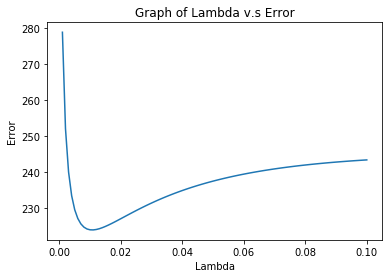

In [1035]:
plt.plot(Gaussian_lambdas,errors1)
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.title('Graph of Lambda v.s Error')

In [1036]:
print("the minimum value of the error is {} and the parameter λ {} ".format(min(errors1),Gaussian_lambdas[errors1.index(min(errors1))]))

the minimum value of the error is 223.83306360281904 and the parameter λ 0.011 


**Polynomial**

In [1037]:
def poly_kernel(x,y,sigma,h):
    res = 0
    for k in range(1,h+1):
        res += np.dot(x.T,y)**k/sigma**(2*k-2)
    return res

In [1038]:
def kernel_2(X,Y,sigma,h):
    K = np.zeros((len(X),len(Y)))
    for i in range(len(Y)):
        for xx in range(len(X)):
            K[xx,i] += poly_kernel(X.iloc[xx],Y.iloc[i],sigma,h)
    return K

In [1039]:
def program_3(X,Y,lamb,y,K):
    N,d = X.shape
    yc = y-np.mean(y)
    ONE = np.ones(N).reshape((-1, 1))
    ID = np.identity(N)
    P = ID - (np.dot(ONE,ONE.T)/N)
    alpha = np.dot(np.linalg.inv(np.dot(P,K) + lamb*ID),yc).reshape(-1,1)
    beta0 = np.mean(y) - np.mean(np.dot(K,alpha))  
    return alpha,beta0

In [1040]:
poly_lambdas = np.linspace(1,100,100)
ERROR = []
for h in [1,2,3,5,8]:
    errors2 = []
    k = kernel_2(X3_test,X3_train,1.5,h)
    K = kernel_2(X3_train,X3_train,1.5,h)
    for lamb in poly_lambdas:
        alpha_hat,beta0_hat = program_3(X3_train,X3_train,lamb,Y3_train,K)
        err = 0
        for kk in range(k.shape[0]):
            pred_y = beta0_hat
            for kkk in range(k.shape[1]):
                pred_y += alpha_hat[kkk][0] * k[kk][kkk]
            err += (Y3_test[kk] - pred_y)**2
        errors2.append(err/k.shape[0])
    ERROR.append(errors2)

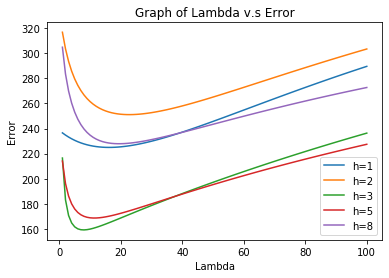

In [1041]:
plt.plot(poly_lambdas,ERROR[0], label = 'h=1')
plt.plot(poly_lambdas,ERROR[1], label = 'h=2')
plt.plot(poly_lambdas,ERROR[2], label = 'h=3')
plt.plot(poly_lambdas,ERROR[3], label = 'h=5')
plt.plot(poly_lambdas,ERROR[4], label = 'h=8')
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.title('Graph of Lambda v.s Error')
plt.legend()

In [1066]:
L = [1,2,3,5,8]
for i in range(5):
    print("when h = {}, the minimum value of the error is {} and the parameter λ {} ".format(L[i],min(ERROR[i]),poly_lambdas[ERROR[i].index(min(ERROR[i]))]))

when h = 1, the minimum value of the error is 224.93512431543564 and the parameter λ 16.0 
when h = 2, the minimum value of the error is 251.08308762574714 and the parameter λ 23.0 
when h = 3, the minimum value of the error is 159.1310659317221 and the parameter λ 8.0 
when h = 5, the minimum value of the error is 168.61455553229388 and the parameter λ 11.0 
when h = 8, the minimum value of the error is 227.87500958730365 and the parameter λ 19.0 


# 5. ADMM Algorithm for LASSO

In [462]:
def s_lamba_rho(v,rho,lamb):
    if v>= lamb*rho:
        return v-lamb*rho
    elif abs(v) <= lamb*rho:
        return 0
    elif v <= -lamb*rho:
        return v+lamb*rho     

In [917]:
from scipy.sparse import random

def ADMM_1(X,Y,rho,lamb):
    N,d = X.shape 
    q = 1
    
    X = (X - X.mean(axis = 0))/(X.std(axis = 0)) #Normalize
    D = np.array([[0 for x in range(d+1)] for y in range(d)]) #d x (d+1) array
    for i in range(d):
        D[i][i+1] = 1 #sigma = 1
    
    x = np.ones([N,1])
    X = np.append(x, X, axis=1) # now X becomes(N*(d+1))
    
    tau = np.zeros(d).reshape(-1,1)
    gamma = np.zeros(d).reshape(-1,1)
    val = d+1
    while True:
        first_term = np.linalg.inv(np.dot(X.T,X)+ (np.dot(D.T,D)/(2*rho))) 
        second_term = np.dot(X.T,Y).reshape(-1,1) + np.dot((D.T/(2*rho)),(gamma-tau))
      
        beta = np.dot(first_term,second_term)
       
        v = np.dot(D,beta)+tau
        for i in range(d):
            gamma[i] = s_lamba_rho(v[i],rho,lamb)
        tau = tau + np.dot(D,beta) - gamma
        
        if np.linalg.norm(np.dot(D,beta)-gamma)<=1e-6:
            break
    for x in range(d+1):
        if beta[x] <1e-5:
            beta[x] = 0            
    return beta 

In [918]:
#Generate X, Y, sparse_beta, 
d = 100
q = 1
N = 1000

X = np.random.rand(N,d) #100x10 matrix

cov = 1 * np.identity(N)

val = d+1
beta_s = random(val, 1, density=0.20).A #d+1 * 1 matrix

x = np.ones([N,1])
XX = np.append(x, X, axis=1) #100x11 matrix

mean = np.dot(XX,beta_s) #1xq 
mean = mean.reshape(-1)
Y = np.random.multivariate_normal(mean, cov) #100*1 matrix
Y.reshape(-1,1).shape

(1000, 1)

In [932]:
lamb_test = np.linspace(1,100,10)

for l in lamb_test:
    rho_test = 1/l
    Beta = ADMM_1(X,Y,rho_test,l) #(d+1)xq
    print('When lambda is {}, the non-vanishing count is {}'.format(l,np.count_nonzero(Beta[1:])))

When lambda is 1.0, the non-vanishing count is 60
When lambda is 12.0, the non-vanishing count is 57
When lambda is 23.0, the non-vanishing count is 52
When lambda is 34.0, the non-vanishing count is 43
When lambda is 45.0, the non-vanishing count is 34
When lambda is 56.0, the non-vanishing count is 29
When lambda is 67.0, the non-vanishing count is 26
When lambda is 78.0, the non-vanishing count is 24
When lambda is 89.0, the non-vanishing count is 23
When lambda is 100.0, the non-vanishing count is 19


# 6. ADMM Algorithm for LASSO: Evaluate

In [304]:
#Generate Lambdas
LAMBS = np.zeros(300)
for i in range(300):
    LAMBS[i] = (i+1)**2

In [312]:
df_lasso = pd.read_csv('project3_F2020_lasso.csv',header = None)
print(df_lasso.shape)
df_lasso.head()

(200, 251)


,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,-21.6280,31.7640,-3.5770,57.089,37.910,35.7980,-3.6400,26.549,40.477,-12.3130,...,-32.7410,61.283,25.1540,29.70700,-72.432,76.2260,-69.0840,4.8036,-53.563,-429.19
1,-83.2790,-30.0710,13.9600,77.597,-34.597,79.9320,-49.7150,106.720,96.440,-7.2870,...,24.6450,24.761,18.6430,-18.37700,79.925,59.6660,17.4140,-15.3740,-71.687,-429.11
2,6.2666,27.5590,68.6640,69.182,34.009,-103.2400,-37.3680,17.718,19.803,-58.4500,...,6.9623,22.438,-27.4840,-8.59840,-79.935,5.0341,44.7210,13.9430,44.687,-319.03
3,14.3840,-54.9920,8.9921,-37.905,-53.627,-37.1820,-1.5407,11.585,-43.070,-1.1006,...,19.0900,-16.531,-26.2750,36.88700,60.559,-60.3790,-23.6160,32.2540,105.550,26.01
4,-57.3240,4.2995,-27.1010,22.133,44.989,8.8092,49.4180,64.399,121.600,30.9140,...,-33.2330,-21.439,2.2357,0.50406,-30.638,-42.2170,-7.4668,48.3700,39.915,386.23


In [902]:
from scipy.sparse import random

def ADMM_1(X,Y,rho,lamb):
    N,d = X.shape 
    q = 1
    
    X = (X - X.mean(axis = 0))/(X.std(axis = 0)) #Normalize
    D = np.array([[0 for x in range(d+1)] for y in range(d)]) #d x (d+1) array
    for i in range(d):
        D[i][i+1] = 1 #sigma = 1
    
    x = np.ones([N,1])
    X = np.append(x, X, axis=1) # now X becomes(N*(d+1))
    
    tau = np.zeros(d).reshape(-1,1)
    gamma = np.zeros(d).reshape(-1,1)
    val = d+1
    while True:
        first_term = np.linalg.inv(np.dot(X.T,X)+ (np.dot(D.T,D)/(2*rho))) 
        second_term = np.dot(X.T,Y).reshape(-1,1) + np.dot((D.T/(2*rho)),(gamma-tau))
      
        beta = np.dot(first_term,second_term)
       
        v = np.dot(D,beta)+tau
        for i in range(d):
            gamma[i] = s_lamba_rho(v[i],rho,lamb)
        tau = tau + np.dot(D,beta) - gamma
        
        if np.linalg.norm(np.dot(D,beta)-gamma)<=1e-6:
            break
    for x in range(d+1):
        if beta[x] <1e-5:
            beta[x] = 0            
    return beta 

In [1043]:
XX = df_lasso.iloc[:,0:250]
YY = df_lasso.iloc[:,250]
N,d = XX.shape
q = 1

LAMBS = np.zeros(300)
for i in range(300):
    LAMBS[i] = (i+1)**2
    
non_van = []
B = []
B21 = []
B36 = []
B200 = []
for i in LAMBS:
    print(i)
    rho = 1/i
    Beta = ADMM_1(XX,YY,rho,i) #(d+1)xq = 251x1
    b0 = Beta[0] #1xq matrix = 1x1
    b = Beta[1:] #dxq matrix = 250*1
    B.append(b)
    non_van.append(np.count_nonzero(b))
    B21.append(b[20])
    B36.append(b[35])
    B200.append(b[199])

1.0
4.0
9.0
16.0
25.0
36.0
49.0
64.0
81.0
100.0
121.0
144.0
169.0
196.0
225.0
256.0
289.0
324.0
361.0
400.0
441.0
484.0
529.0
576.0
625.0
676.0
729.0
784.0
841.0
900.0
961.0
1024.0
1089.0
1156.0
1225.0
1296.0
1369.0
1444.0
1521.0
1600.0
1681.0
1764.0
1849.0
1936.0
2025.0
2116.0
2209.0
2304.0
2401.0
2500.0
2601.0
2704.0
2809.0
2916.0
3025.0
3136.0
3249.0
3364.0
3481.0
3600.0
3721.0
3844.0
3969.0
4096.0
4225.0
4356.0
4489.0
4624.0
4761.0
4900.0
5041.0
5184.0
5329.0
5476.0
5625.0
5776.0
5929.0
6084.0
6241.0
6400.0
6561.0
6724.0
6889.0
7056.0
7225.0
7396.0
7569.0
7744.0
7921.0
8100.0
8281.0
8464.0
8649.0
8836.0
9025.0
9216.0
9409.0
9604.0
9801.0
10000.0
10201.0
10404.0
10609.0
10816.0
11025.0
11236.0
11449.0
11664.0
11881.0
12100.0
12321.0
12544.0
12769.0
12996.0
13225.0
13456.0
13689.0
13924.0
14161.0
14400.0
14641.0
14884.0
15129.0
15376.0
15625.0
15876.0
16129.0
16384.0
16641.0
16900.0
17161.0
17424.0
17689.0
17956.0
18225.0
18496.0
18769.0
19044.0
19321.0
19600.0
19881.0
20164.0
20449.

i) number of non-vanishing coefficients

Text(0, 0.5, 'Count')

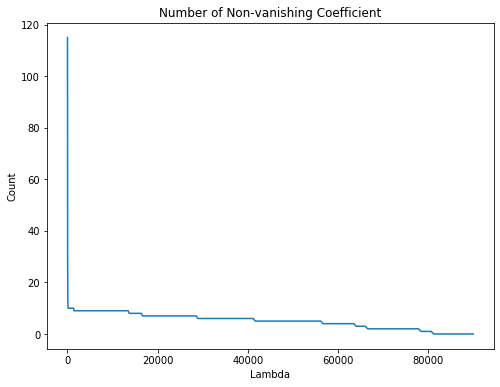

In [1044]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(LAMBS,non_van)
ax.set_title('Number of Non-vanishing Coefficient')
ax.set_xlabel('Lambda')
ax.set_ylabel('Count')

ii) $b_k(j)$ for j = 21,36 and 200

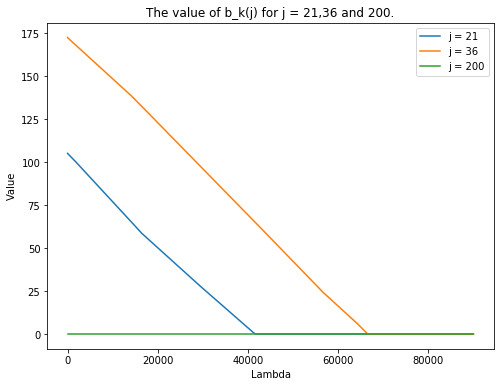

In [1045]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(LAMBS,B21, label = 'j = 21')
ax.plot(LAMBS,B36, label = 'j = 36')
ax.plot(LAMBS,B200, label = 'j = 200')
ax.set_title('The value of b_k(j) for j = 21,36 and 200.')
ax.set_xlabel('Lambda')
ax.set_ylabel('Value')
ax.legend()

iii)  increments $(b_{k+1}(j) − b_k(j))/(λ_{k+1} − λ_k)$ for k = 1, . . . , n − 1 for the same values of j.

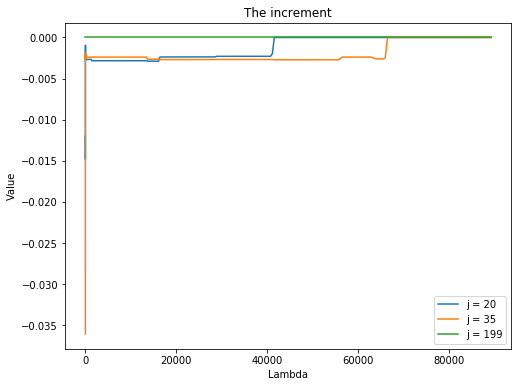

In [1054]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('The increment')
ax.set_xlabel('Lambda')
ax.set_ylabel('Value')
for j in [20,35,199]:
    INC = []
    for k in range(0,299):
        inc = (B[k+1][j] - B[k][j])/(LAMBS[k+1]-LAMBS[k])
        INC.append(inc)  
    ax.plot(LAMBS[0:299],INC, label = 'j = {}'.format(j))   
ax.legend()

# 7. Proximal Gradient Algorithm for LASSO

In [965]:
def gradient_b0(b0,b,alpha,X,Y):
    res = 0
    for i in range(Y.shape[0]):
        res += Y[i] - b0 - np.dot(b.T,X.iloc[i])
    res *= 2*alpha
    return res

In [966]:
def gradient_b(b0,b,alpha,X,Y):
    res = 0
    for i in range(Y.shape[0]):
        res += X.iloc[i] * (Y[i] - b0 - np.dot(b.T,X.iloc[i]))
    res *= 2*alpha
    return res

In [1060]:
XX = df_lasso.iloc[:,0:250]
XX = (XX - XX.mean(axis = 0))/(XX.std(axis = 0))
YY = df_lasso.iloc[:,250]
print('X_shape:',XX.shape)
print('Y_shape:',YY.shape)
N,d = XX.shape

val = d+1
beta = random(val, 1, density=0.20).A #d+1 * 1 matrix
print('beta_shape:',beta.shape)

X_shape: (200, 250)
Y_shape: (200,)
beta_shape: (251, 1)


In [1228]:
a = np.zeros(251).reshape(-1,1)
a[0]

array([0.])

In [1259]:
tolerance = 1e-3
def problem3_4(alpha,lamb,X,Y): 
    N,d = X.shape
    val = d+1
    
    beta = random(val, 1, density=0.2).A
    #beta = np.zeros(251).reshape(-1.1)
    
    b0 = beta[0]
    b = beta[1:]
    
    count = 0
    indicator = True

    current_b0 = b0
    current_b = b
    

    while indicator:
        temp_b0 = current_b0 + gradient_b0(current_b0,current_b,alpha,X,Y)
        temp_b = current_b + gradient_b(current_b0,current_b,alpha,X,Y).to_numpy().reshape(-1,1)

        new_b0 = temp_b0
        
        new_b = np.zeros(d).reshape(-1,1)
        for i in range(len(temp_b)):
            if temp_b[i] < 0:
                sign = -1
            else:
                sign = 1               
            new_b[i] = sign * max(temp_b[i]-alpha*lamb, 0)
        
        for j in range(d):
            if np.abs(new_b[j]) < 1e-5:
                new_b[j]=0
        
        if  np.linalg.norm(new_b - current_b) < tolerance \
           and np.linalg.norm(new_b0 - current_b0) < tolerance:
            indicator = False
            return (new_b0,new_b,count)
        else:
            current_b0 = new_b0
            current_b = new_b
            count+=1

In [1260]:
alpha = 1e-9
non_van2 = []
BB = []
BB21 = []
BB36 = []
BB200 = []

for lamb in LAMBS:
    print(lamb)
    new_b0,new_b,_ = problem3_4(alpha,lamb,XX,YY)  #b0 is 1xq matrix = 1x1, #b is dxq matrix = 250*1
    BB.append(new_b)
    non_van2.append(np.count_nonzero(new_b))
    BB21.append(new_b[21])
    BB36.append(new_b[36])
    BB200.append(new_b[200])

1.0
4.0
9.0
16.0
25.0
36.0
49.0
64.0
81.0
100.0
121.0
144.0
169.0
196.0
225.0
256.0
289.0
324.0
361.0
400.0
441.0
484.0
529.0
576.0
625.0
676.0
729.0
784.0
841.0
900.0
961.0
1024.0
1089.0
1156.0
1225.0
1296.0
1369.0
1444.0
1521.0
1600.0
1681.0
1764.0
1849.0
1936.0
2025.0
2116.0
2209.0
2304.0
2401.0
2500.0
2601.0
2704.0
2809.0
2916.0
3025.0
3136.0
3249.0
3364.0
3481.0
3600.0
3721.0
3844.0
3969.0
4096.0
4225.0
4356.0
4489.0
4624.0
4761.0
4900.0
5041.0
5184.0
5329.0
5476.0
5625.0
5776.0
5929.0
6084.0
6241.0
6400.0
6561.0
6724.0
6889.0
7056.0
7225.0
7396.0
7569.0
7744.0
7921.0
8100.0
8281.0
8464.0
8649.0
8836.0
9025.0
9216.0
9409.0
9604.0
9801.0
10000.0
10201.0
10404.0
10609.0
10816.0
11025.0
11236.0
11449.0
11664.0
11881.0
12100.0
12321.0
12544.0
12769.0
12996.0
13225.0
13456.0
13689.0
13924.0
14161.0
14400.0
14641.0
14884.0
15129.0
15376.0
15625.0
15876.0
16129.0
16384.0
16641.0
16900.0
17161.0
17424.0
17689.0
17956.0
18225.0
18496.0
18769.0
19044.0
19321.0
19600.0
19881.0
20164.0
20449.

Text(0, 0.5, 'Count')

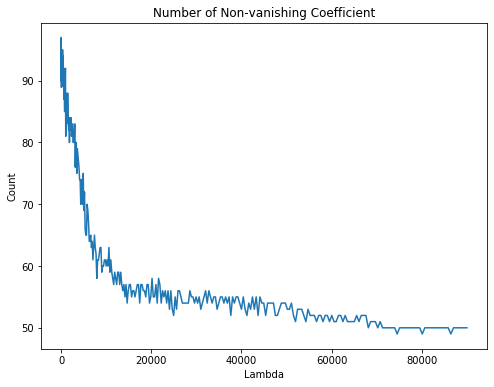

In [1261]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(LAMBS,non_van2)
ax.set_title('Number of Non-vanishing Coefficient')
ax.set_xlabel('Lambda')
ax.set_ylabel('Count')

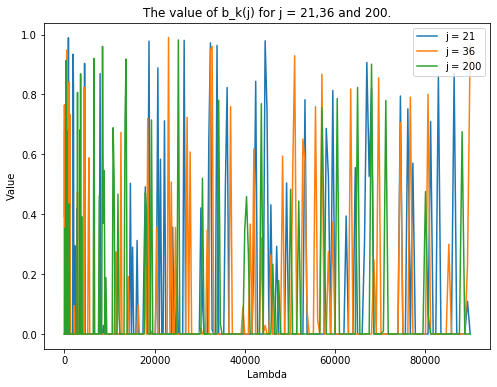

In [1262]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(LAMBS,BB21, label = 'j = 21')
ax.plot(LAMBS,BB36, label = 'j = 36')
ax.plot(LAMBS,BB200, label = 'j = 200')
ax.set_title('The value of b_k(j) for j = 21,36 and 200.')
ax.set_xlabel('Lambda')
ax.set_ylabel('Value')
ax.legend()

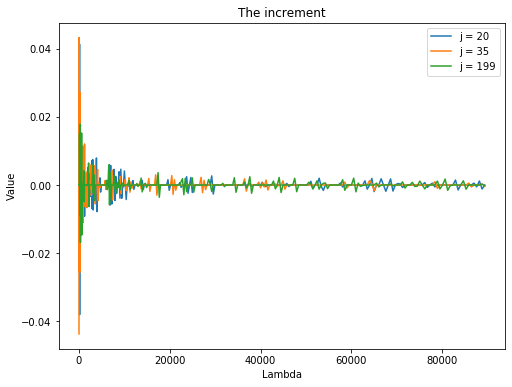

In [1263]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('The increment')
ax.set_xlabel('Lambda')
ax.set_ylabel('Value')
for j in [20,35,199]:
    INCC = []
    for k in range(0,299):
        inc = (BB[k+1][j] - BB[k][j])/(LAMBS[k+1]-LAMBS[k])
        INCC.append(inc)  
    ax.plot(LAMBS[0:299],INCC,label = 'j = {}'.format(j))  
ax.legend()